# Neural Network for MNIST database recognizing - **CNN with Tensorflow**

This is a Neural Network developed with `Tensorflow`, only for learning purposes. The objective of this project is learn more about Convolutional Neural Networks (CNN's) and how to use them with TensorFlow.


## 1 - Library Imports

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPool2D, Flatten, Dense, Reshape, BatchNormalization, Normalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import MeanSquaredError, SparseCategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.regularizers import L2

import matplotlib.pyplot as plt
import os
import mnist

## 2 - MNIST Datasets download

In [2]:
if(not os.path.isdir("./datasets/")):
    os.mkdir("./datasets")
if(not os.path.isfile("./datasets/train-images-idx3-ubyte.gz")):
    mnist.download_file("train-images-idx3-ubyte.gz", "./datasets")
if(not os.path.isfile("./datasets/train-labels-idx1-ubyte.gz")):
    mnist.download_file("train-labels-idx1-ubyte.gz", "./datasets")
if(not os.path.isfile("./datasets/t10k-images-idx3-ubyte.gz")):
    mnist.download_file("t10k-images-idx3-ubyte.gz", "./datasets")
if(not os.path.isfile("./datasets/t10k-labels-idx1-ubyte.gz")):
    mnist.download_file("t10k-labels-idx1-ubyte.gz", "./datasets")

## 3 - MNIST Datasets Load

In [3]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

## 4 - Neural Network Model

In [4]:
EPOCHS = 15
MINIBATCH_SIZE = 512
REGULARIZATION = 1e-4

model = Sequential([
    tf.keras.Input(shape=(28, 28)),
    Normalization(),
    Reshape((28, 28, 1), input_shape=(28, 28)),
    Conv2D(4, 5, padding='same', activation='relu', kernel_regularizer=L2(REGULARIZATION)),
    BatchNormalization(),
    Conv2D(8, 5, padding='same', activation='relu', kernel_regularizer=L2(REGULARIZATION)),
    AveragePooling2D(),
    BatchNormalization(),
    Conv2D(12, 3, activation='relu', kernel_regularizer=L2(REGULARIZATION)),
    BatchNormalization(),
    Conv2D(24, 5, strides=(2,2), activation='relu', kernel_regularizer=L2(REGULARIZATION)),
    BatchNormalization(),
    Conv2D(48, 3, activation='relu', kernel_regularizer=L2(REGULARIZATION)),
    AveragePooling2D(),
    BatchNormalization(),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=L2(REGULARIZATION)),
    BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=L2(REGULARIZATION)),
    BatchNormalization(),
    Dense(16, activation='relu', kernel_regularizer=L2(REGULARIZATION)),
    BatchNormalization(),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 28, 28)            57        
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 4)         104       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 4)         16        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 8)         808       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 8)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 8)         3

## 5 - Neural Network Training

In [5]:
model.compile(
            optimizer=Adam(learning_rate=1e-3),
            loss=SparseCategoricalCrossentropy(),
            metrics=[SparseCategoricalAccuracy()]
)

model.fit(train_images, train_labels, batch_size=MINIBATCH_SIZE, epochs=EPOCHS)

Epoch 1/15
118/118 [==============================] - 20s 161ms/step - loss: 0.7022 - sparse_categorical_accuracy: 0.8360
Epoch 2/15
118/118 [==============================] - 19s 165ms/step - loss: 0.1621 - sparse_categorical_accuracy: 0.9722
Epoch 3/15
118/118 [==============================] - 20s 171ms/step - loss: 0.0990 - sparse_categorical_accuracy: 0.9829
Epoch 4/15
118/118 [==============================] - 19s 158ms/step - loss: 0.0729 - sparse_categorical_accuracy: 0.9875
Epoch 5/15
118/118 [==============================] - 19s 161ms/step - loss: 0.0593 - sparse_categorical_accuracy: 0.9901
Epoch 6/15
118/118 [==============================] - 19s 162ms/step - loss: 0.0524 - sparse_categorical_accuracy: 0.9916
Epoch 7/15
118/118 [==============================] - 19s 164ms/step - loss: 0.0448 - sparse_categorical_accuracy: 0.9932
Epoch 8/15
118/118 [==============================] - 20s 171ms/step - loss: 0.0401 - sparse_categorical_accuracy: 0.9941
Epoch 9/15
118/118 [====

## 6 - Measuring accuracy on test set

In [6]:
test_softmax = model.predict(test_images)
test_outputs = np.array([np.argmax(outp) for outp in test_softmax])
test_comparison = np.array([np.array_equal((test_outputs[i]), test_labels[i]) for i in range(test_outputs.shape[0])])
test_accuracy = np.sum(test_comparison)*100/test_comparison.shape[0]
print(f"Accuracy on test set prediction: {test_accuracy} %")

Accuracy on test set prediction: 99.16 %


## 7 - Measuring accuracy on train set

In [7]:
train_softmax = model.predict(train_images)
train_outputs = np.array([np.argmax(outp) for outp in train_softmax])
train_comparison = np.array([np.array_equal(np.argmax(train_outputs[i]), np.argmax(train_labels[i])) for i in range(train_outputs.shape[0])])
train_accuracy = np.sum(train_comparison)*100/train_comparison.shape[0]
print(f"Accuracy on train set prediction: {train_accuracy} %")

Accuracy on train set prediction: 100.0 %


## 8 - Test playground

Saída esperada: 5
Saída predita: 5


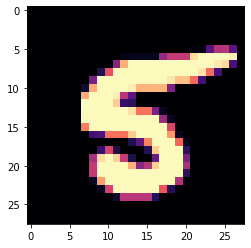

In [8]:
index = int(np.round(np.random.rand()*len(test_images)))

plt.imshow(test_images[index], cmap='magma')
print(f"Saída esperada: {test_labels[index]}")
test_predict = model.predict(test_images[index].reshape(1, 28, 28))
print(f"Saída predita: {np.argmax(test_predict)}")